In [0]:
import statsmodels
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns

In [0]:
def task_accpetance(x, y):
    if x < 300:
        return True if y < 3 else False
    
    if x < 600 and x > 300:
        return True if y < 1 else False

    if x < 900 and x > 600:
        return True if y < 2 else False

In [0]:
def rejection_sampling_distribution(
        n_samples,
        acceptance,
        x_sampler,
        y_sampler,
) -> np.array:

    generated_samples = []
    generated_samples_count = 0

    while generated_samples_count < n_samples:
        x_sample = x_sampler()
        y_sample = y_sampler()

        if acceptance(x_sample, y_sample):
            generated_samples.append(x_sample)
            generated_samples_count += 1

    return np.array(generated_samples)

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [0]:
random_dist = rejection_sampling_distribution(
    n_samples=10_000,
    acceptance=task_accpetance,
    x_sampler=lambda: 900*np.random.rand(),
    y_sampler=lambda: 3*np.random.rand(),
)

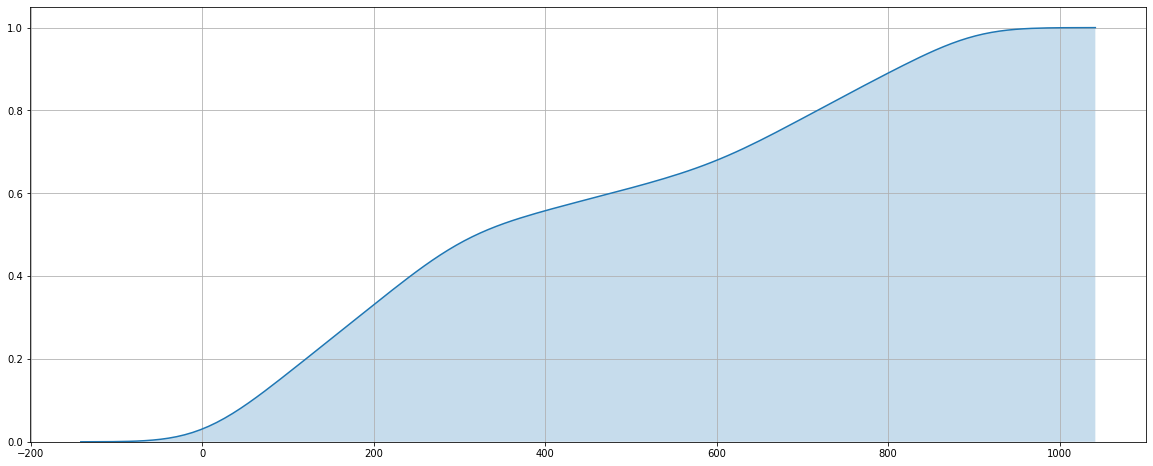

In [0]:
figure = plt.figure(figsize=[20, 8])
sns.kdeplot(random_dist, cumulative=True, shade=True)
plt.grid()

In [0]:
from statsmodels.distributions.empirical_distribution import ECDF

In [0]:
ecdf = ECDF(random_dist)

In [0]:
ecdf(20)

0.033100000000000004

In [0]:
from scipy import stats

In [0]:
def exponential(x: float, rate: float = 1.0) -> float:
    return rate * np.exp(-1 * rate * x) if x > 0 else 0

In [0]:
random_normal_dist = rejection_sampling_distribution(
    n_samples=10_000,
    acceptance=lambda x, y: np.abs(x) <= 1 + np.sqrt(-2*np.log(y)),
    x_sampler=lambda: 10*np.random.rand() - 5,
    y_sampler=lambda: np.random.rand(),
)

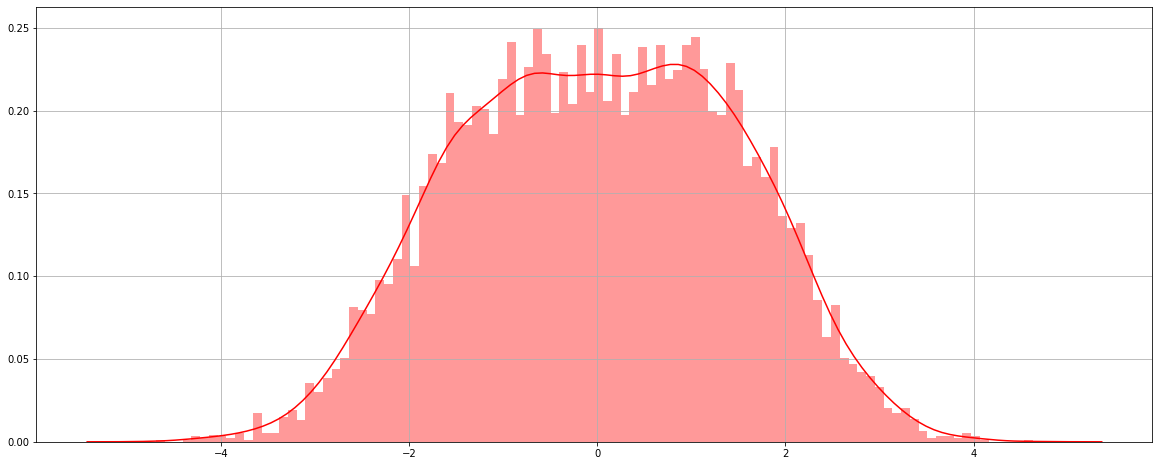

In [0]:
figure = plt.figure(figsize=[20, 8])
sns.distplot(random_normal_dist, color='r', bins=100)
plt.grid()

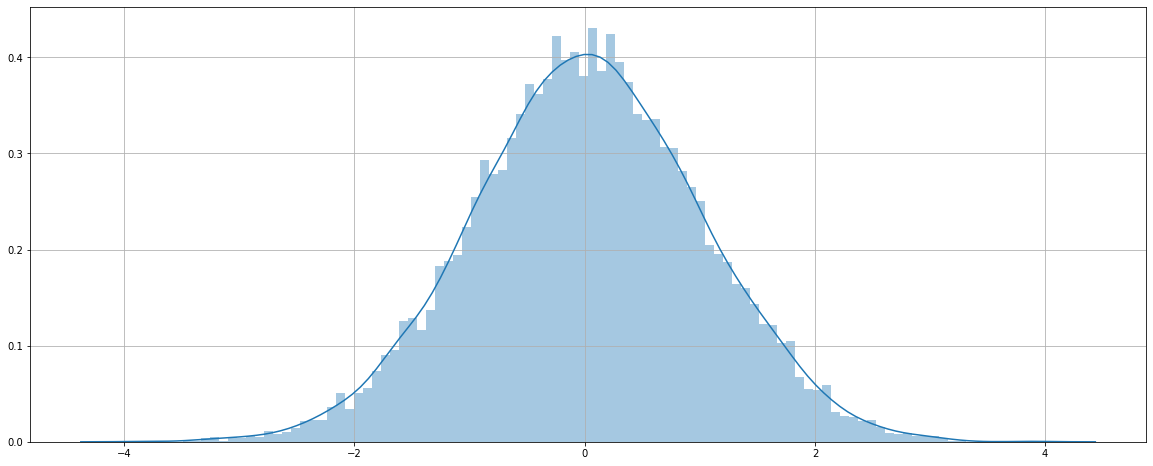

In [0]:
figure = plt.figure(figsize=[20, 8])
sns.distplot(stats.norm.rvs(size=10000), bins=100)
plt.grid()

In [0]:
stats.norm.pdf(5)

1.4867195147342979e-06

In [0]:
from scipy.stats import ks_2samp
ks_2samp(stats.norm.rvs(size=10_000), random_normal_dist)

Ks_2sampResult(statistic=0.1231, pvalue=2.11750643807456e-66)

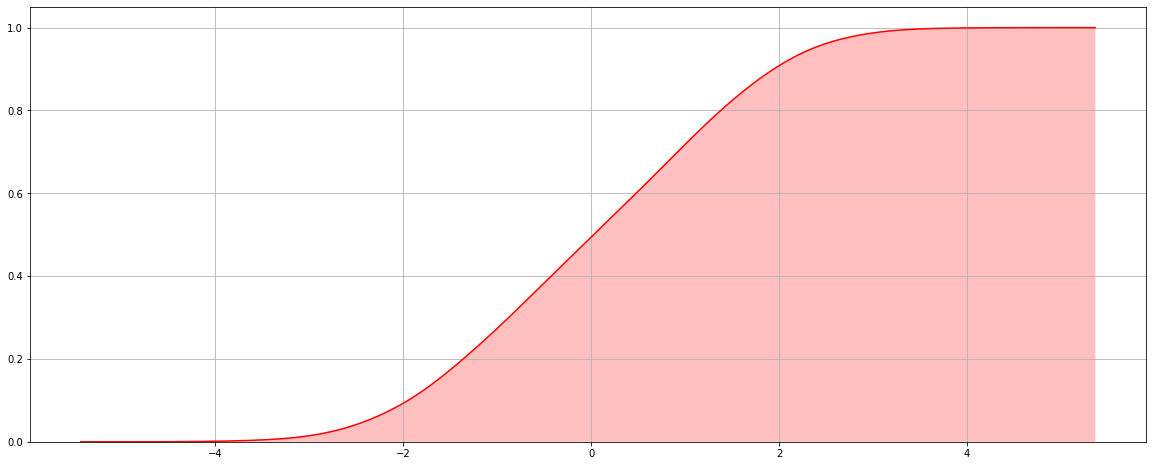

In [0]:
figure = plt.figure(figsize=[20, 8])
sns.kdeplot(random_normal_dist, cumulative=True, shade=True, color='r')
plt.grid()